In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url='https://drive.google.com/file/d/1VfCaU5vFVWsSYrvKQF2x9iS6I7KoWEVH/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.shape

(11275, 5)

In [18]:
new_row = {'cf_rating':1173,'cc_rating':1605}
df.loc[len(df)]=new_row

In [19]:
y=df['cf_rating']
x=df['cc_rating']
print('Values cc :',len(x),'Values cf :',len(y))
x=x.dropna()
y=y.dropna()
print("Removing nan cc :",len(x),"Removing nan cf :",len(y))

Values cc : 11276 Values cf : 11276
Removing nan cc : 10281 Removing nan cf : 7438


## **We can only take users who have both ratings and we will filter out those who have only one rating.**

In [20]:
df_filtered = df.dropna(subset=['cf_rating','cc_rating'])
x=df_filtered['cc_rating']
y=df_filtered['cf_rating']
df_filtered.shape

(6443, 5)

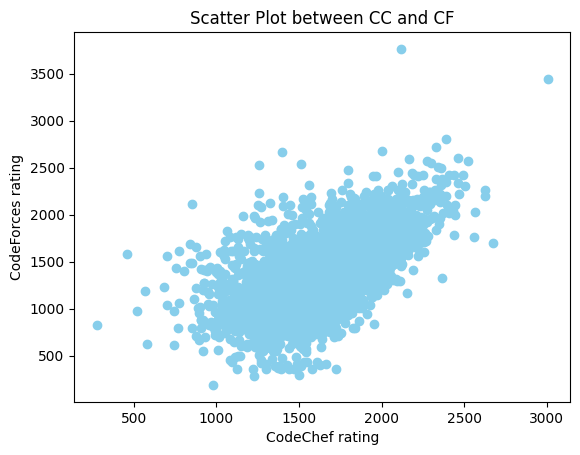

In [21]:
plt.scatter(x,y,color='skyblue')
plt.title("Scatter Plot between CC and CF")
plt.xlabel('CodeChef rating')
plt.ylabel('CodeForces rating')
plt.show()

Now we first use seaborn to see liner regression graph and then find it

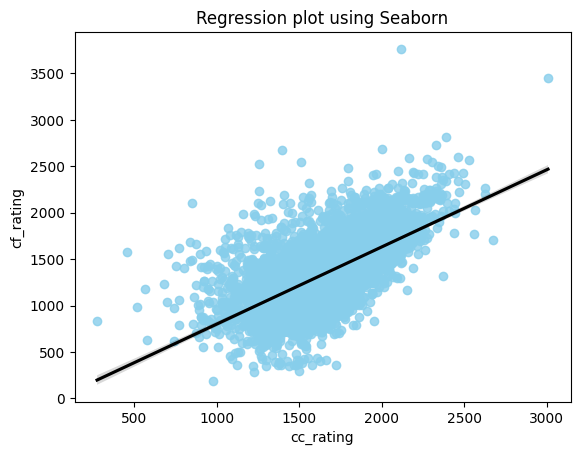

In [22]:
sns.regplot(x=x,y=y,scatter_kws={"color": "skyblue"}, line_kws={"color": "black"})
plt.title('Regression plot using Seaborn')
plt.show()

#using denominator method to find weight(w) and Bias(b) in y_pred=w*x+b

In [23]:
denominator=x.dot(x)-x.mean()*x.sum()
w=(x.dot(y)-y.mean()*x.sum())/denominator
b=(x.dot(x)*y.mean()-x.mean()*x.dot(y))/denominator
w,b

(np.float64(0.8315887573744821), np.float64(-32.69435614829572))

# Predicting values equation

In [24]:
# codechef_rating to codeforce_rating =>  y_pred = codeforce rating & x = codechef rating
y_pred=w*x+b

In [26]:
#codeforce_rating to codechef_rating => y = codeforce rating & x_predict = codechef rating
x_predict=(y-b)/w

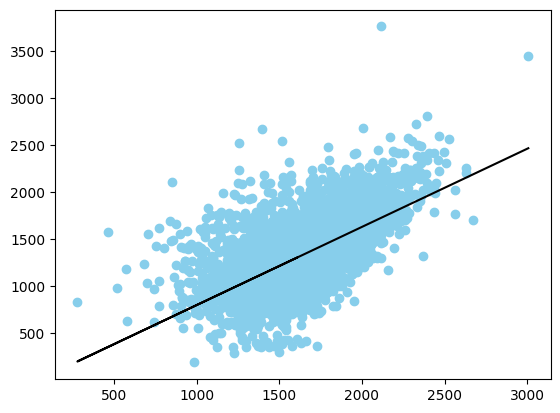

In [29]:
plt.scatter(x,y , color="skyblue")
plt.plot(x,y_pred,color='black')
plt.show()